# 1. Priprema i vizualizacija podataka

In [5]:
import pandas as pd
import numpy as np

Najprije ćemo učitati skup podataka.

In [6]:
df = pd.read_csv("data/wdbc.data.csv", header=None)
df

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


Zatim ćemo imenovati stupce prema opisu dobivenom od izvora podataka.

Svaki redak predstavlja podatke o jednoj digitalnoj slici FNA dojke.

Prva dva stupca su ID i konačna dijagnoza.

Postoji deset realnih značajki na kojima se bazira ovaj skup podataka, čiji su nazivi spremljeni u `rv_features`. Za svaki od redaka su za svaku od tih deset značajki izvučene tri vrijednosti: srednja vrijednost, standardna pogreška i "najgora" vrijednost. Najgora vrijednost je izračunata kao srednja vrijednost tri najveće vrijednosti. Time dobivamo 30 realnih značajki, odnosno ukupno 32 stupca.

In [7]:
rv_features = ["radius", "texture", "perimeter", "area", "smoothness", "compactness", "concavity", "concave points", "symmetry", "fractal dimension"]
feature_groups = ["mean", "se", "worst"]
columns = ["id", "diagnosis"]
for ft_grp in feature_groups:
  for val in rv_features:
    columns.append(ft_grp + "_" + val)
df.columns = columns
df

,id,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave points,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave points,worst_symmetry,worst_fractal dimension
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


Pogledajmo osnovne informacije o skupu podataka, poput distribucije klasa.

In [32]:
class_dist = df['diagnosis'].value_counts()

num_total = len(df.index)
num_benign = class_dist[0]
num_malignant = class_dist[1]
print("Class distribution:")
print("Benign: \t", num_benign, "(" + str(np.around(100 * num_benign / num_total, decimals=2)) + "%)")
print("Malignant: \t", num_malignant, "(" + str(np.around(100 * num_malignant / num_total, decimals=2)) + "%)")

Class distribution:
Benign: 	 357 (62.74%)
Malignant: 	 212 (37.26%)


## Nedostajuće i stršeće vrijednosti

U ovom koraku ćemo provjeriti ima li u skupu nedostajućih ili stršećih vrijednosti. Za nedostajuće vrijednosti je odgovor vrlo jednostavan, jer i unaprijed znamo da nema takvih vrijednosti u ovom skupu podataka. Međutim, za stršeće vrijednosti ćemo morati napraviti malo detaljniju analizu.

In [34]:
pd.set_option('display.max_columns', 50)
df.describe()

,id,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave points,mean_symmetry,mean_fractal dimension,se_radius,se_texture,se_perimeter,se_area,se_smoothness,se_compactness,se_concavity,se_concave points,se_symmetry,se_fractal dimension,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave points,worst_symmetry,worst_fractal dimension
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Iz dobivenih podataka o srednjim vrijednostima i standardnim devijacijama odokativnim z-testom vidimo da praktički svaki od stupaca sadrži stršeće vrijednosti. To znači da ćemo im svakako morati posvetiti pažnju u nastavku.

## Vizualizacija značajki

Pošto imamo samo jednu kategoričku značajku (dijagnoza), koja će nam ujedno služi i kao oznaka kasnije, histogrami se nameću kao vrlo prikladna vizualizacija za preostale realne značajke. Ovdje ćemo kratko razmotriti distribucije nekih značajki.

Najprije ćemo pogledati distribucije značajki koje predstavljaju srednje vrijednosti, odnosno počinju s `mean_`. Pošto su sve od vrijednosti zapravo izračunate srednje vrijednosti, očekivali bismo normalne razdiobe za ovakve tipove značajki. Vidimo da značajke poput `mean_radius`, `mean_texture`, `mean_smoothness` i `mean_symmetry` otprilike imaju poznati zvonolik oblik kakav ima normalna distribucija. S druge strane, značajke `mean_concavity` i `mean_concave_points` imaju distribucije čiji su vrhovi (eng. mode) kod nižih vrijednosti na lijevoj strani histograma.

Dodatno, primjećujemo i nekolicinu značajki na repovima distribucije, što upućuje na to da su to stršeće vrijednosti.

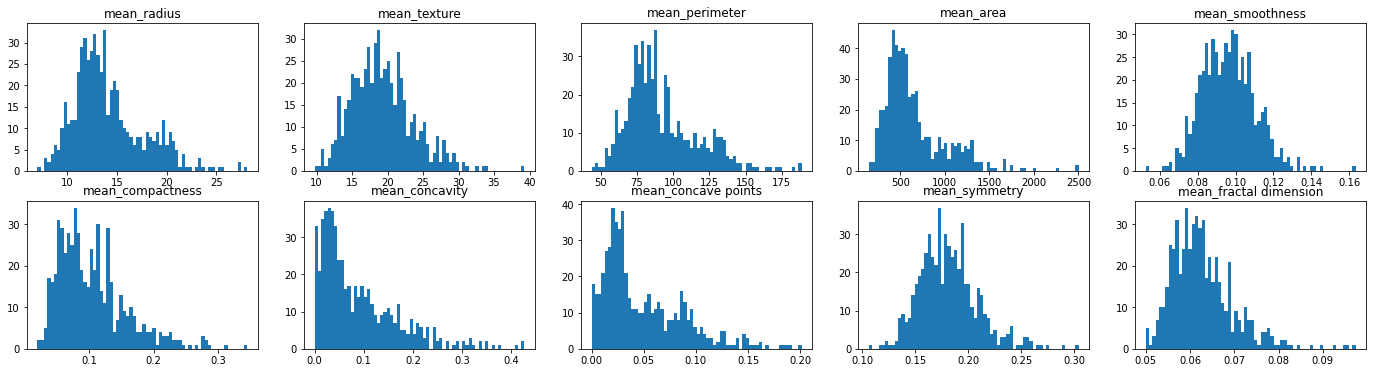

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize=[24, 6])
for i in range(10):
  plt.subplot(2, 5, i+1)
  plt.title(columns[i+2])
  plt.hist(df[columns[i+2]], bins=64);

Za kraj ćemo pogledati distribucije značajki koje predstavljaju najgore vrijednosti, odnosno one koje počinju s `worst_`. Ove su distribucije vrlo sličnih oblika prethodno analiziranim distribucijama za `mean_` značajke. Ipak, može se vidjeti da su u usporedbi s njima "teže" na desnom kraju distribucije. Ovo je za očekivati zbog načina na koji su `worst_` značajku i dobivene.

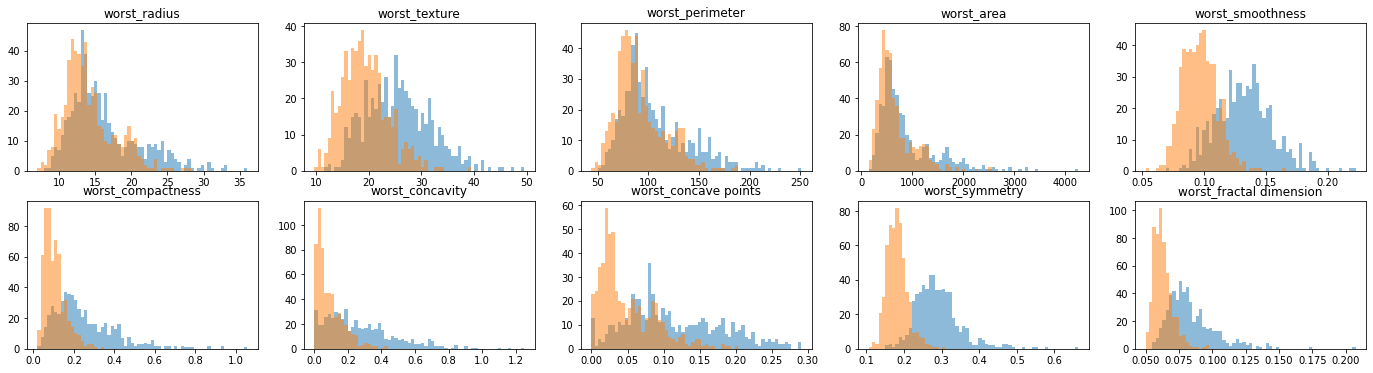

In [49]:
plt.figure(figsize=[24, 6])
for i in range(10):
  plt.subplot(2, 5, i+1)
  plt.title(columns[i+22])
  x_max = np.amax([df[columns[i+22]].max(), df[columns[i+2]].max()])
  x_min = np.amin([df[columns[i+22]].min(), df[columns[i+2]].min()])
  bins = np.linspace(x_min, x_max, 64)
  plt.hist(df[columns[i+22]], alpha=0.5, bins=bins);
  plt.hist(df[columns[i+2]], alpha=0.5, bins=bins);

# 2. Replikacija rezultata